In [13]:
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

import pickle # Using this option to make sure we can open pickled dataframes back
pickle.HIGHEST_PROTOCOL = 4

import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
#import streamlit as st
import numpy as np
import plotly.graph_objects as go
import logging
import geopandas as gpd
import shapely
from geopy.geocoders import Nominatim
from scipy.spatial.distance import cdist
from shapely.wkt import loads
from functools import wraps
import time 
import contextily as ctx

In [14]:
with open('./data/Gf.pkl', 'rb') as input:
    G = pickle.load(input)
with open('./data/BoI_simple.pkl', 'rb') as input:
    BoI = pickle.load(input) 


In [15]:
gdNodes,gdStreets = ox.utils_graph.graph_to_gdfs(G)
gdNodes = gdNodes.to_crs("EPSG:4326")
print(gdNodes.crs)
gdNodes.head()

EPSG:4326


,osmid,osmid_original,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,,,
0,0,125730,5.412452e+06,456781.900993,4,2.410732,48.863523,NaN,NaN,POINT (456781.901 5412451.867)
1,1,268675130,5.412447e+06,456789.384246,5,2.410834,48.863483,NaN,NaN,POINT (456789.384 5412447.384)
2,2,2841627108,5.412574e+06,456744.278141,4,2.410206,48.864623,crossing,NaN,POINT (456744.278 5412574.377)
3,3,244455548,5.412347e+06,456794.553236,4,2.410915,48.862578,NaN,NaN,POINT (456794.553 5412346.737)
4,4,1089076050,5.412436e+06,456658.320573,4,2.409049,48.863371,NaN,NaN,POINT (456658.321 5412435.861)


<AxesSubplot:>

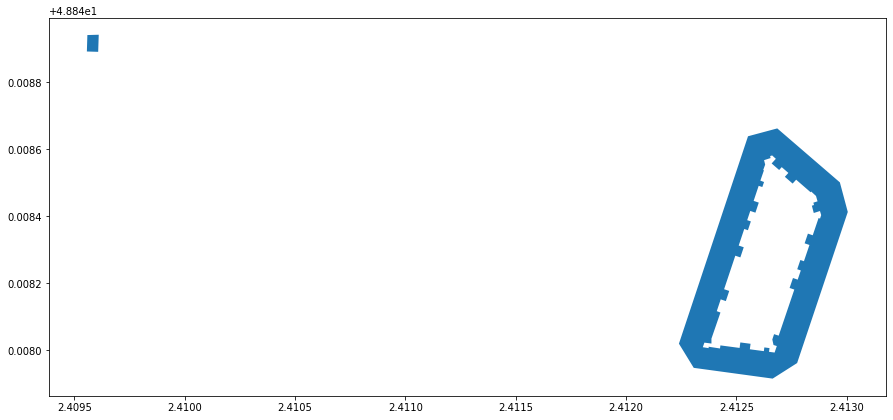

In [16]:
BAT = gpd.GeoDataFrame(BoI.reset_index())
BAT[13:15].plot( figsize=(15,15) )

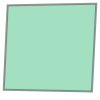

In [17]:
BAT.loc[14].geometry

In [18]:
import io
import re
import subprocess
import zlib
from itertools import chain

import numpy as np
from descartes import PolygonPatch
from shapely.affinity import translate
from shapely.geometry import LineString, Polygon
# import gobject-inspect, cairo and rsvg if the native rsvg SVG_RENDERER should be used
from shapely.ops import unary_union


# Creating shadows

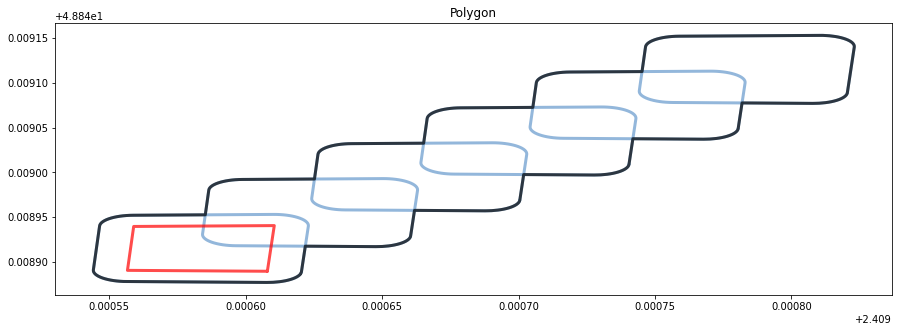

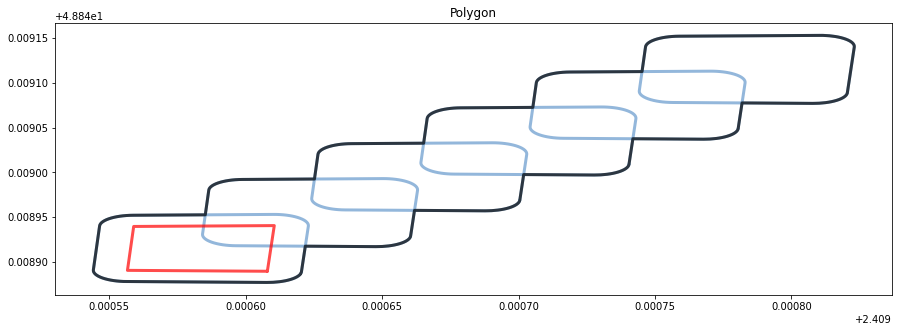

In [19]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

elevation = 5*3
blur_radius = elevation / 6 * 0.25/50000.0
init = [BAT.loc[14].geometry.buffer(blur_radius)]

for k in range(5):
    init.append(translate(init[-1],
                                xoff=(0.00004), yoff=(0.00004)) )
cu = unary_union(init)


for k in range(len(init)):
    X,Y = init[k].exterior.xy
    ax.plot(X, Y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    
x,y = BAT.loc[14].geometry.exterior.xy
ax.plot(x, y, color='red', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

x,y = cu.exterior.xy
ax.plot(x, y, color='black', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

ax.set_title('Polygon')
fig

# Let's make it industrial

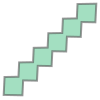

In [20]:
def createShadow(geo):
    init = [geo]#.buffer(blur_radius)
    for k in range(5):
        init.append(translate(init[-1], xoff=(0.00004), yoff=(0.00004)) )
    cu = unary_union(init)
    return cu


createShadow(BAT.loc[14].geometry)

In [21]:
from tqdm import tqdm 
tqdm.pandas()

In [22]:
BAT["shade"] = ""
for bat in BAT:
    BAT["shade"] = BAT.geometry.progress_apply(lambda x: createShadow(x))

100%|██████████| 4718/4718 [00:20<00:00, 228.24it/s]


In [23]:
BAT["shade"] 

0       POLYGON ((2.41489 48.84676, 2.41491 48.84685, ...
1       POLYGON ((2.41554 48.84703, 2.41541 48.84704, ...
2       POLYGON ((2.41240 48.84755, 2.41239 48.84752, ...
3       POLYGON ((2.41397 48.84756, 2.41397 48.84758, ...
4       POLYGON ((2.41085 48.84818, 2.40999 48.84819, ...
                              ...                        
4713    POLYGON ((2.33972 48.89972, 2.33969 48.89972, ...
4714    POLYGON ((2.34196 48.90052, 2.34195 48.90063, ...
4715    POLYGON ((2.33915 48.89942, 2.33915 48.89946, ...
4716    POLYGON ((2.33874 48.89990, 2.33877 48.89990, ...
4717    MULTIPOLYGON (((2.33905 48.90123, 2.33929 48.9...
Name: shade, Length: 4718, dtype: geometry

In [24]:
cBAT = BAT.drop(['geometry'], axis=1)
cBAT["geometry"] = cBAT["shade"] 
cBAT = cBAT.drop(['shade'], axis=1)

In [25]:
with open('data/BoI_shaded.pkl', 'wb') as output: 
    pickle.dump(cBAT, output)

<AxesSubplot:>

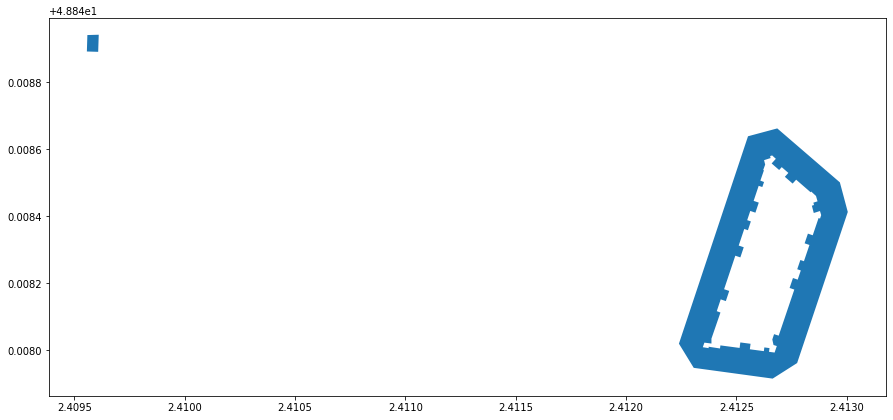

In [26]:
BAT = gpd.GeoDataFrame(BoI.reset_index())
BAT[13:15].plot( figsize=(15,15) )

<AxesSubplot:>

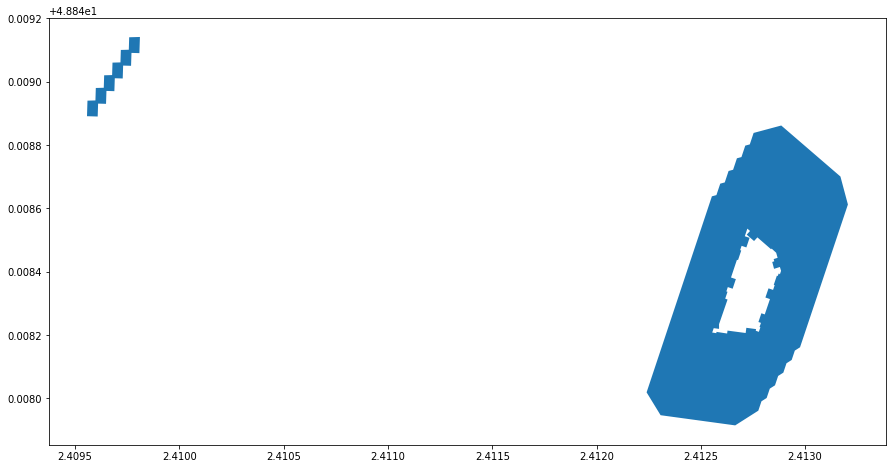

In [27]:
cBAT[13:15].plot( figsize=(15,15) )

In [28]:
BAT

,level_0,level_1,Name,Description,geometry
0,0,0,U,,"POLYGON ((2.41497 48.84675, 2.41497 48.84676, ..."
1,0,1,U,,"POLYGON ((2.41587 48.84823, 2.41585 48.84823, ..."
2,0,2,U,,"POLYGON ((2.41266 48.84753, 2.41252 48.84754, ..."
3,0,3,U,,"POLYGON ((2.41393 48.84754, 2.41402 48.84753, ..."
4,0,4,U,,"POLYGON ((2.41022 48.84797, 2.41071 48.84796, ..."
...,...,...,...,...,...
4713,0,4713,U,,"POLYGON ((2.33988 48.89965, 2.33972 48.89964, ..."
4714,0,4714,U,,"POLYGON ((2.34200 48.90063, 2.34200 48.90052, ..."
4715,0,4715,U,,"POLYGON ((2.33914 48.89968, 2.33921 48.89969, ..."
4716,0,4716,U,,"POLYGON ((2.33877 48.89988, 2.33874 48.89988, ..."


In [31]:
import pickle
# Using this option to make sure we can open pickled dataframes back
pickle.HIGHEST_PROTOCOL = 4

In [32]:
with open('./data/BoI_shaded.pkl', 'rb') as input:
    S = pickle.load(input)

<AxesSubplot:>

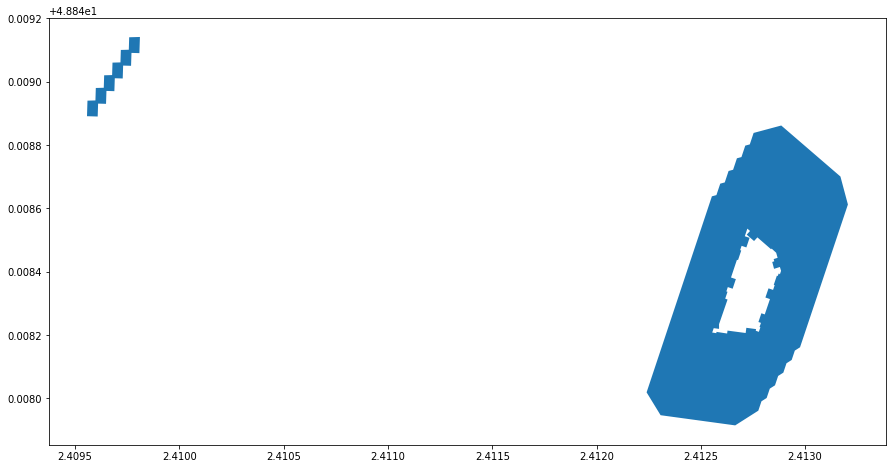

In [33]:
s = S[13:15]
s.plot( figsize=(15,15) )

/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<AxesSubplot:>

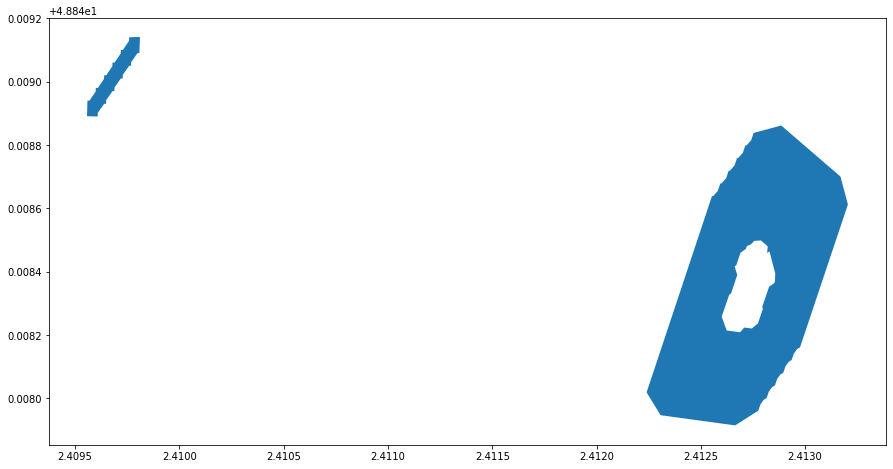

In [34]:
from shapely.geometry import shape, JOIN_STYLE
eps = 0.00003  # epsilon that is approx. the width of slivers, e.g. 1 mm

s = S[13:15]
# Here's the algorithm
fx = s.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.bevel)

fx.plot( figsize=(15,15) )

In [35]:
fx = S.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.bevel)


/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [36]:
S.geometry = fx

In [37]:
len(S)

4718

In [38]:
pickle.HIGHEST_PROTOCOL = 5
SS = S.dissolve().explode()
pickle.HIGHEST_PROTOCOL = 4
len(SS)

619

In [39]:
import pickle
# Using this option to make sure we can open pickled dataframes back
pickle.HIGHEST_PROTOCOL = 4
with open('data/BoI_shaded_simple.pkl', 'wb') as output: 
    pickle.dump(SS, output)

<AxesSubplot:>

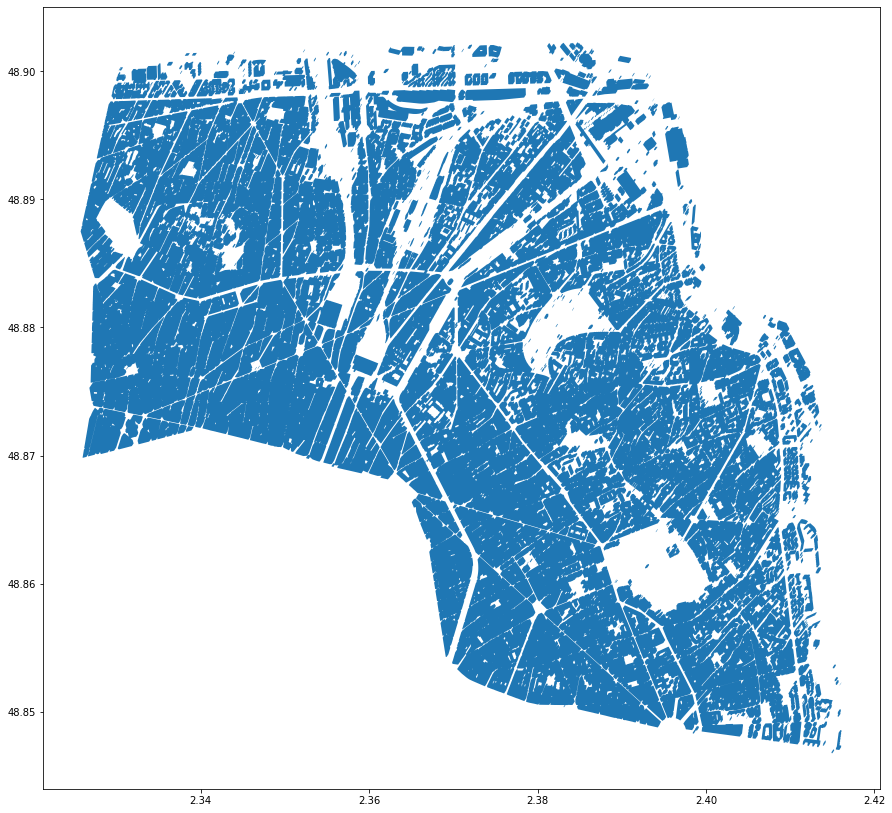

In [40]:
SS.plot(figsize=(15,15))

<AxesSubplot:>

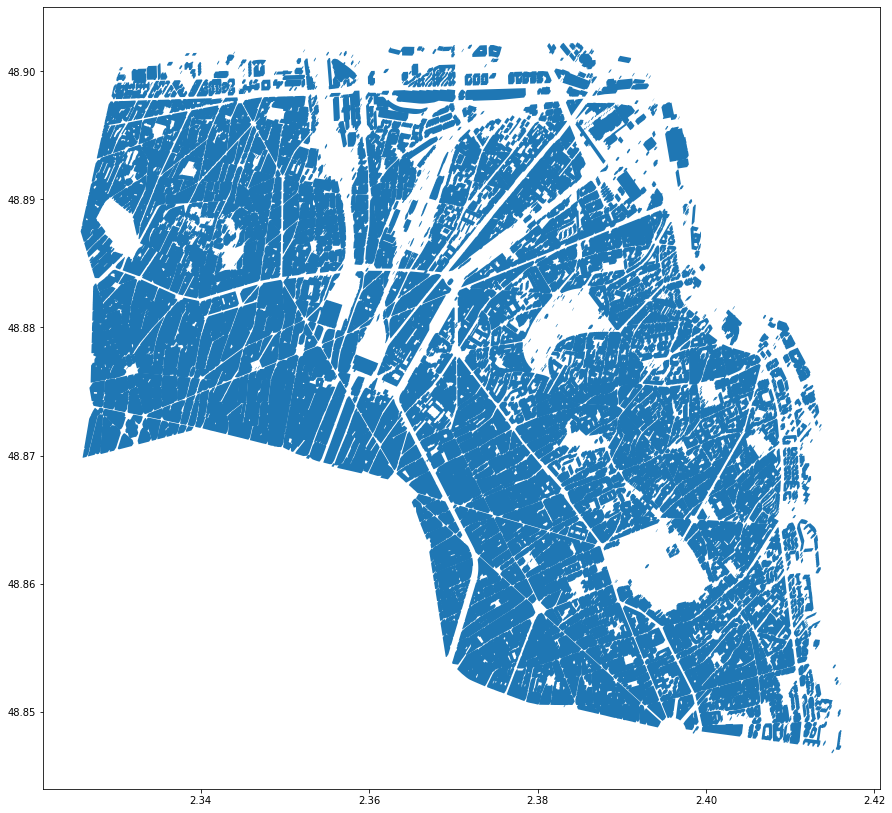

In [41]:
S.plot(figsize=(15,15))